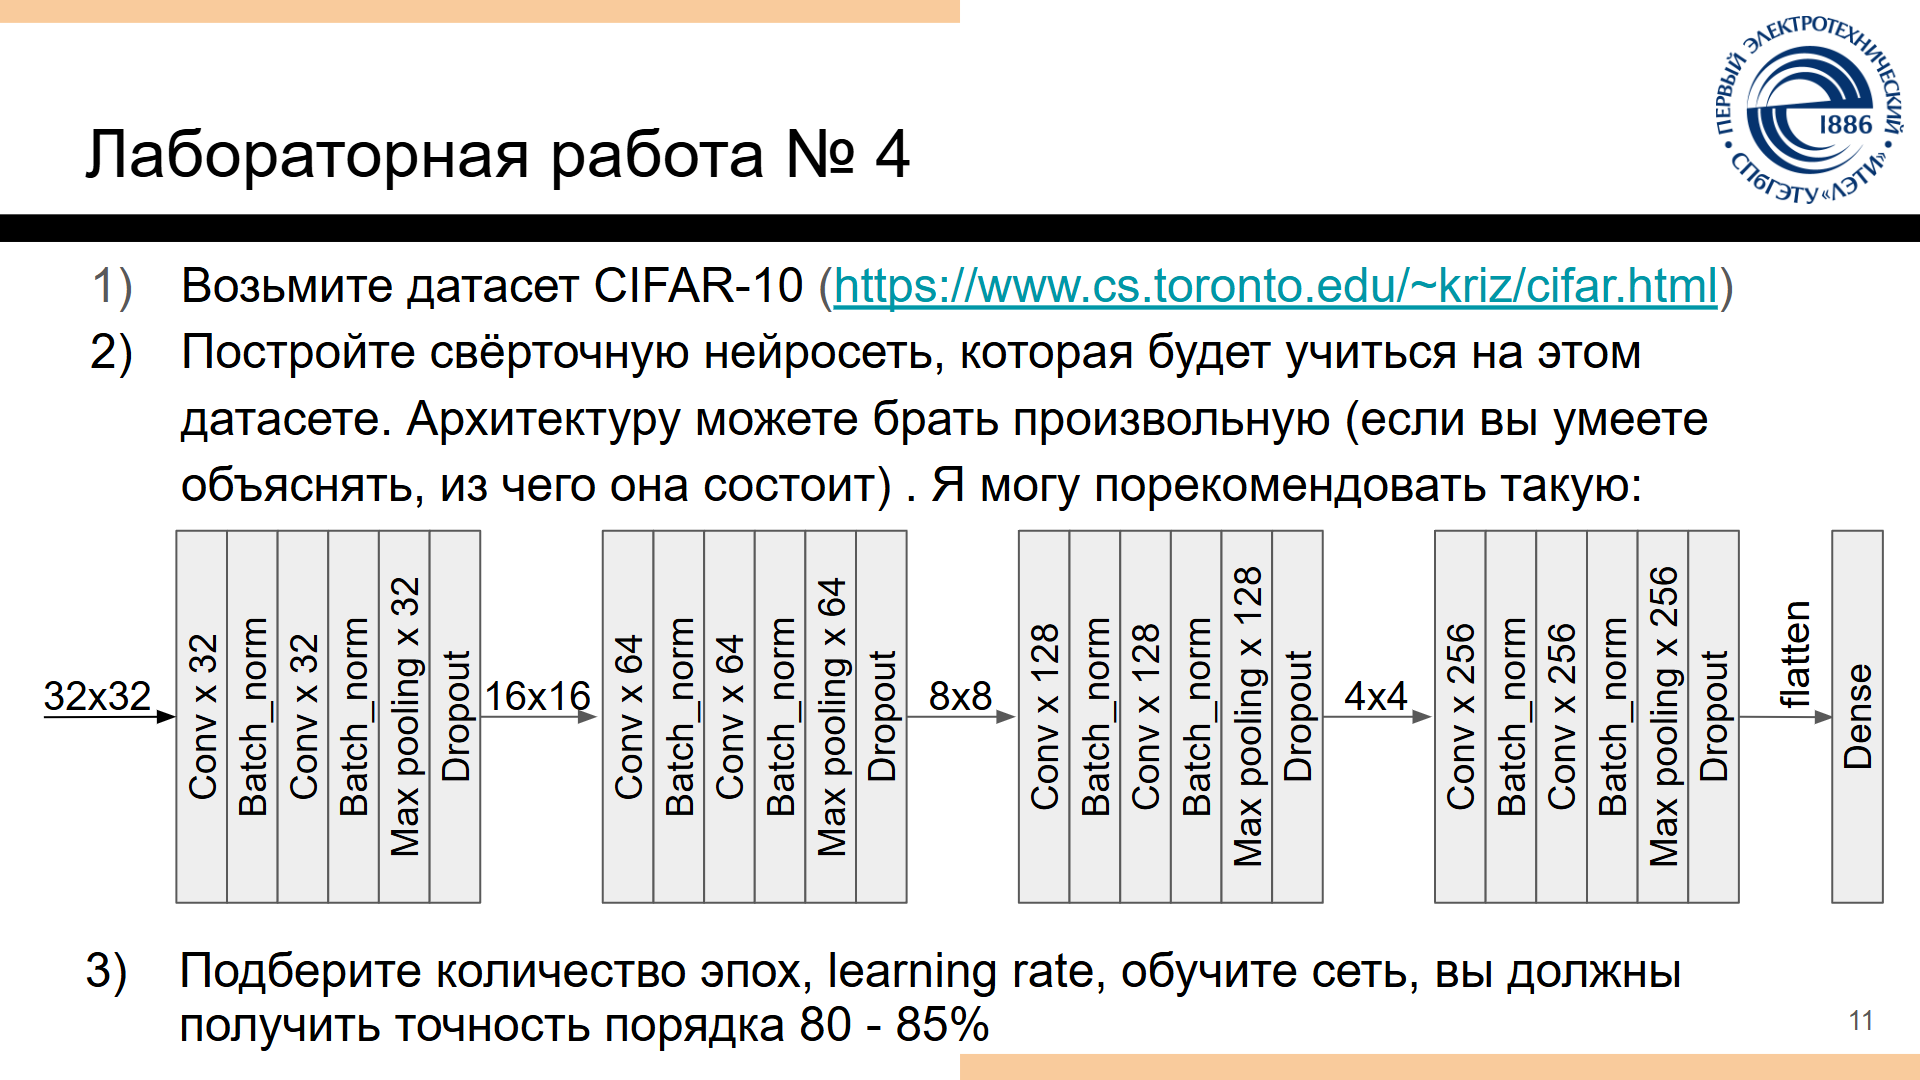

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from keras import utils

from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_ = pickle.load(fo, encoding='bytes')
    return dict_


X_train = np.empty((0, 1024*3), dtype=np.uint8)
y_train = list()
for i in range(1, 6):
    X_train = np.vstack([X_train, unpickle(f"cifar-10-batches-py/data_batch_{i}")[b"data"]])
    y_train.extend(unpickle(f"cifar-10-batches-py/data_batch_{i}")[b"labels"])
X_test : np.ndarray = unpickle(f"cifar-10-batches-py/test_batch")[b"data"]
y_test = unpickle(f"cifar-10-batches-py/test_batch")[b"labels"]


# Преобразование X_train в 4D массив (50000, 32, 32, 3)
red_channel = X_train[:, :1024].reshape(-1, 32, 32)
green_channel = X_train[:, 1024:2048].reshape(-1, 32, 32)
blue_channel = X_train[:, 2048:].reshape(-1, 32, 32)
X_train = np.stack((red_channel, green_channel, blue_channel), axis=-1)

# Преобразование X_test в 4D массив (50000, 32, 32, 3)
red_channel = X_test[:, :1024].reshape(-1, 32, 32)
green_channel = X_test[:, 1024:2048].reshape(-1, 32, 32)
blue_channel = X_test[:, 2048:].reshape(-1, 32, 32)
X_test = np.stack((red_channel, green_channel, blue_channel), axis=-1)


print("X_train shape", X_train.shape)
print("y_train len", len(y_train))
print("X_test shape", X_test.shape)
print("y_test len", len(y_test))
# unpickle("cifar-10-batches-py/batches.meta")

X_train shape (50000, 32, 32, 3)
y_train len 50000
X_test shape (10000, 32, 32, 3)
y_test len 10000


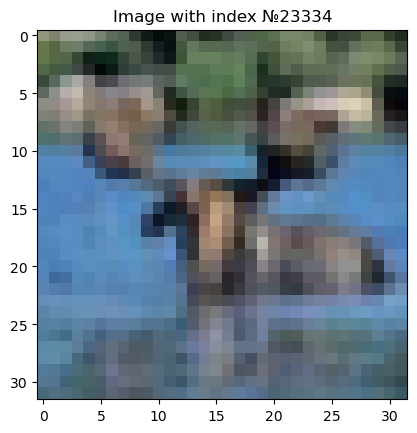

In [4]:
index_image = np.random.randint(0, len(X_train)+1)
img = X_train[index_image]

# # Если img.shape == 3072, разделяем массив на цветовые компоненты и формируем изображение, 
# size = 32  # Размер одной стороны изображения
# red = img[:1024].reshape((size, size))
# green = img[1024:2048].reshape((size, size))
# blue = img[2048:].reshape((size, size))
# # Объединяем каналы в одно изображение
# img = np.stack([red, green, blue], axis=-1)

# Визуализация изображения
plt.imshow(img) 
# plt.axis('off')
plt.title(f'Image with index №{index_image}')
plt.show()

In [204]:
X_train = X_train.astype('float32')   # конвертируем данные в формат float.
X_test = X_test.astype('float32')

X_train /= 255                        # нормируем каждый пиксель каждой картинки.
X_test /= 255

In [205]:
nb_classes = 10 # количество цифр от 0 до 9

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [206]:
# модель Sequential обозначает совокупность линейно связанных друг с другой слоёв. Это самая типичная и распронанённая модель нейросетей

model = Sequential()

In [207]:
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

In [208]:
# Второй сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

In [209]:
# Третий сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

In [210]:
# Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

In [211]:
# Полносвязные слои
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_48 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_49 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [212]:
# Мы указваем здесь перекрёстную энтропию в качестве функции потерь - метрики близости
# А также модификацию Адама градиентного спуска
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [213]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=8,
          validation_data=(X_test, Y_test),
          shuffle=True,
          verbose=1)

Epoch 1/8
391/391 [==============================] - 107s 269ms/step - loss: 1.3447 - accuracy: 0.5268 - val_loss: 2.6980 - val_accuracy: 0.2667
Epoch 2/8
391/391 [==============================] - 111s 283ms/step - loss: 0.8324 - accuracy: 0.7077 - val_loss: 1.0815 - val_accuracy: 0.6429
Epoch 3/8
391/391 [==============================] - 107s 274ms/step - loss: 0.6436 - accuracy: 0.7736 - val_loss: 0.6770 - val_accuracy: 0.7648
Epoch 4/8
391/391 [==============================] - 105s 269ms/step - loss: 0.5266 - accuracy: 0.8163 - val_loss: 0.6859 - val_accuracy: 0.7673
Epoch 5/8
391/391 [==============================] - 92s 235ms/step - loss: 0.4392 - accuracy: 0.8463 - val_loss: 0.6569 - val_accuracy: 0.7897
Epoch 6/8
391/391 [==============================] - 106s 272ms/step - loss: 0.3683 - accuracy: 0.8708 - val_loss: 0.7573 - val_accuracy: 0.7661
Epoch 7/8
391/391 [==============================] - 105s 269ms/step - loss: 0.3020 - accuracy: 0.8949 - val_loss: 0.5846 - val_acc

In [214]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test score:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 22ms/step - loss: 0.6418 - accuracy: 0.8073
Test score: 0.6417874693870544
Test accuracy: 0.8072999715805054


In [215]:
predictions = model.predict(X_test)

313/313 [==============================] - 8s 22ms/step


In [216]:
predictions[0] # Из этого следует, что нет смысла менять доверительный интервал

array([1.7972867e-04, 1.7252331e-05, 2.6486570e-04, 8.2007682e-01,
       5.0106843e-04, 1.7711683e-01, 2.0237235e-04, 1.5276521e-03,
       1.1525314e-05, 1.0189147e-04], dtype=float32)